In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
import cmath

In [2]:
imgLena = cv.imread('IMG_1114.jpg', 0)
imgDog = cv.imread('IMG_1115.jpg', 0)

imgLena = cv.resize(imgLena, (512, 512))
imgDog = cv.resize(imgDog, (512, 512))

In [3]:
def FFT(x):
    
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]

    if N-1 == 0:
        return x
    
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])

        coeff = np.exp(-2j * np.pi * np.arange(N/2) / N)

        return np.concatenate([X_even + coeff[:int(N/2)] * X_odd, X_even - coeff[:int(N/2)] * X_odd])


In [4]:
def IFFT(x):
    N = x.shape[0]

    return (1/N * np.conj(FFT(np.conj(x))))

In [5]:
def FFT_2D(img):
    rows = img.shape[0]
    cols = img.shape[1]

    FFT_y = np.zeros((rows, cols), complex)
    FFT_xy = np.zeros((rows, cols), complex)

    for x in range(rows):
        FFT_y[x] = FFT(img[x])
    
    for y in range(cols):
        FFT_xy[:,y] = FFT(FFT_y[:,y])
    
    return FFT_xy

In [6]:
def IFFT_2D(img):
    rows = img.shape[0]
    cols = img.shape[1]

    IFFT_y = np.zeros((rows, cols), complex)
    IFFT_xy = np.zeros((rows, cols), complex)

    for x in range(rows):
        IFFT_y[x] = IFFT(img[x])
    
    for y in range(cols):
        IFFT_xy[:,y] = IFFT(IFFT_y[:,y])
    
    return IFFT_xy

In [7]:
def swapMagPhase(src1, src2):
    # Phase: src1
    # Magnitude: src2

    rows = src1.shape[0]
    cols = src1.shape[1]

    retFFT = np.zeros((rows, cols), dtype = complex)
    retFFT = np.multiply(np.abs(src2), np.exp(1j*np.angle(src1)))

    return retFFT

In [8]:
FFTLena = FFT_2D(imgLena)
FFTDog = FFT_2D(imgDog)

FFT_LpDm = swapMagPhase(FFTLena, FFTDog)
FFT_DpLm = swapMagPhase(FFTDog, FFTLena)

In [9]:
LpDm = IFFT_2D(FFT_LpDm)
DpLm = IFFT_2D(FFT_DpLm)

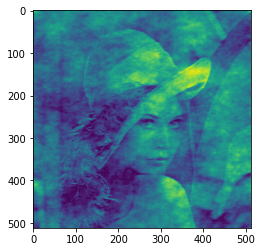

In [15]:
img1 = np.abs(LpDm)
plt.imshow(img1)

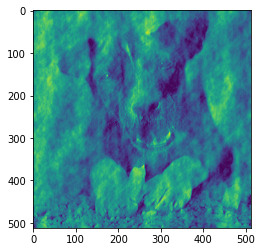

In [17]:
img2 = np.abs(DpLm)
plt.imshow(img2)

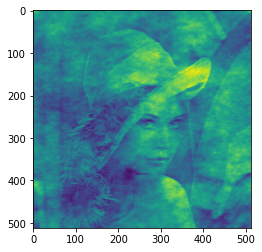

In [18]:
img3 = np.real(np.fft.ifft2(FFT_LpDm))
plt.imshow(img3)

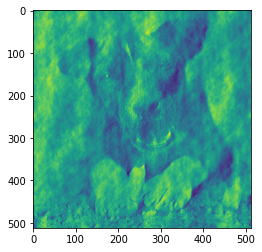

In [19]:
img4 = np.real(np.fft.ifft2(FFT_DpLm))
plt.imshow(img4)

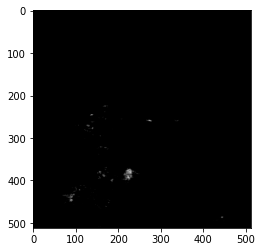

In [14]:
plt.imshow(np.subtract(img1, img3), cmap='gray')